In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

SEED = 42
np.random.seed(SEED)

#Cargar el dataset
url_wine = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

column_names = [
    'fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
    'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
    'pH', 'sulphates', 'alcohol', 'quality'
]
df_wine = pd.read_csv(url_wine, names=column_names, sep=';', header=0)

In [2]:
df_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
#Verificar valores nulos
print(df_wine.isnull().sum())

x_wine = df_wine.drop('quality', axis=1)
y_wine = df_wine['quality']


fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Distrbucion de las clases: [  0   0   0  10  53 681 638 199  18]


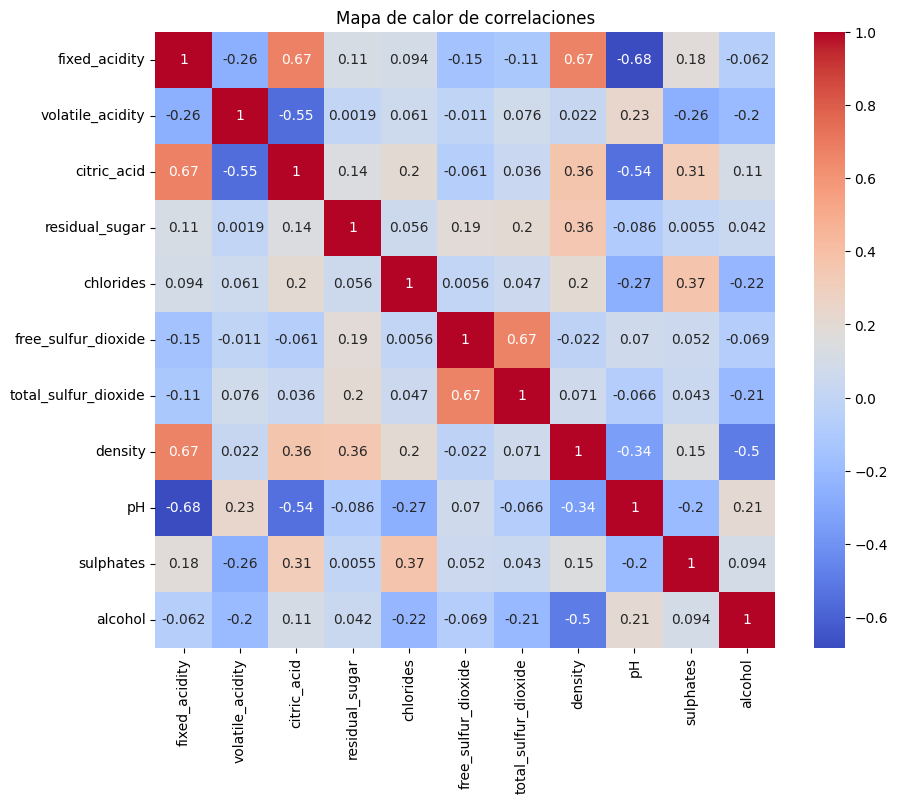

In [5]:
print(f"Distrbucion de las clases: {np.bincount(y_wine)}")

plt.figure(figsize=(10,8))
sns.heatmap(x_wine.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlaciones')
plt.show()

In [6]:
x_train_wine, x_test_wine, y_train_wine, y_test_wine = train_test_split(x_wine, y_wine, test_size=0.25, random_state=SEED, shuffle=True)
scaler = StandardScaler()
x_train_scaled_w = scaler.fit_transform(x_train_wine)
x_test_scaled_w = scaler.transform(x_test_wine)

models = {
    #'Regresion_Logistica': LogisticRegression(),
    'Arbol_Decision': DecisionTreeClassifier(),
    'Naive_Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier()
}

def eval_model_wine(model, x_test, y_test):
    model.fit(x_train_scaled_w, y_train_wine)
    y_pred = model.predict(x_test)
    return accuracy_score(y_test, y_pred)

results_wine = {}
for name, model in models.items():
    accuracy = eval_model_wine(model, x_test_scaled_w, y_test_wine)
    results_wine[name] = accuracy

df_results_wine = pd.DataFrame(list(results_wine.items()), columns=['Modelo', 'Precision'])
df_results_wine = df_results_wine.sort_values(by='Precision', ascending=False)
df_results_wine



,Modelo,Precision
0,Arbol_Decision,0.5875
2,KNN,0.5775
1,Naive_Bayes,0.5450


In [11]:
final_model = DecisionTreeClassifier()
final_model.fit(x_train_scaled_w, y_train_wine)

y_pred_tree = final_model.predict(x_test_scaled_w)

print(f"La precisiones de arbol sin podar: {accuracy_score(y_test_wine, y_pred_tree)*100:.2f}%")

model_tree_p = DecisionTreeClassifier(max_depth=15, min_samples_leaf=5, random_state=42)

model_tree_p.fit(x_train_scaled_w,y_train_wine)

y_pred_tree_p = model_tree_p.predict(x_test_scaled_w)

print(f"La precisiones de arbol con podar: {accuracy_score(y_test_wine, y_pred_tree_p)*100:.2f}%")

classes = [3, 4, 5, 6, 7, 8]


La precisiones de arbol sin podar: 59.00%
La precisiones de arbol con podar: 58.25%


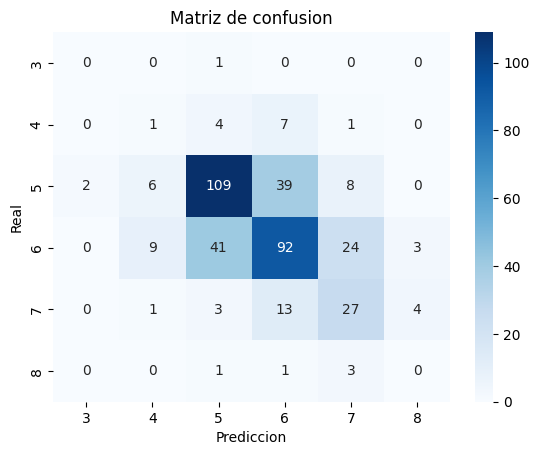

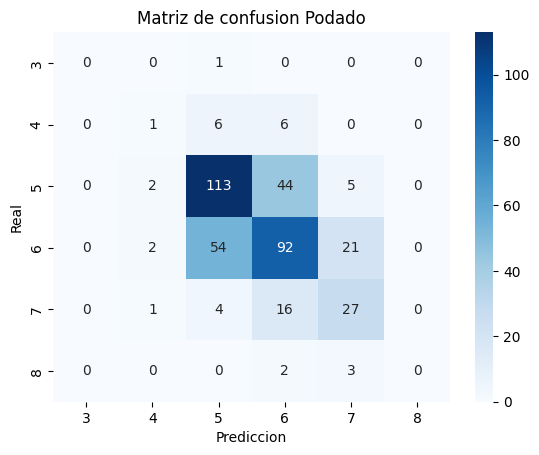

In [10]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test_wine, y_pred_tree)
cm2 = confusion_matrix(y_test_wine,y_pred_tree_p)

sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title("Matriz de confusion")
plt.xlabel("Prediccion")
plt.ylabel("Real")
plt.show()

sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title("Matriz de confusion Podado")
plt.xlabel("Prediccion")
plt.ylabel("Real")
plt.show()
